In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", keras.metrics.Precision(name="hans"),
                                    keras.metrics.Recall()])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy", keras.metrics.Precision(name="hans"),
                                    keras.metrics.Recall()])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                               

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [70]:
wert_der_abhaengig_von_der_position_ist = [3, 2, 1, 0, 1, 2, 3] #-> Sample 1, Sample 2
iterator = wert_der_abhaengig_von_der_position_ist.__iter__()
iterator.__next__()
iterator.__next__()
iterator.__next__()
iterator.__next__()

0

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Only take one and zeros
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [60]:
import models
model = models.classiRaw3D(training_dataset.element_spec[0].shape, None, reconstruction=False)

(55000,)

In [23]:
total_size = 1536 * 2047 * 2044 * 2
print("Total Size: " + str(total_size))

last_element_begin = (88 * 23 + 2 * 72 * 28 * 2047) * 1536
print("Last Element Begin: " + str(last_element_begin))

last_bscan_last_element = 2 * 1536 * 2047 * 27 + last_element_begin + 1536 * 23
print("Differenz: " + str(total_size - last_bscan_last_element))
print("Should be: 1 bscan vor Ende: 3144192")

Total Size: 12853456896
Last Element Begin: 12680491008
Differenz: 3144192
Should be: 1 bscan vor Ende: 3144192


In [6]:
import BinaryReader
import InputList
from importlib import reload
import numpy as np
reload(BinaryReader)

br = BinaryReader.BinaryReader(output_data_type=np.dtype("b"))
bag = br.create_test_dataset([InputList.diabetic_testing_files[0]])
for instance in bag.take(1):
    print(instance)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(<tf.Tensor: shape=(3072, 102, 102, 1), dtype=uint16, numpy=
array([[[[   32],
         [   96],
         [   96],
         ...,
         [   32],
         [65408],
         [   64]],

        [[65440],
         [65472],
         [    0],
         ...,
         [   96],
         [65472],
         [65472]],

        [[65440],
         [65408],
         [65440],
         ...,
         [65504],
     

In [43]:
import InputList
import BinaryReader
import time
import tensorflow as tf

def benchmark(benchmark_dataset, num_epochs=2):
    start_time = time.perf_counter()
    for epoch_num in range(num_epochs):
        for sample in benchmark_dataset:
            pass
            # Performing a training step
            #time.sleep(0.01)

    print("Execution time:", time.perf_counter() - start_time)

reader = BinaryReader.BinaryReader()
ds = reader.create_test_dataset(InputList.diabetic_training_files[0:2]).batch(10).take(50)

# THIS IS ONLY GOOD WITH GPU
optimized_ds = tf.data.Dataset.range(2)\
    .interleave(lambda _: ds,
                num_parallel_calls=tf.data.AUTOTUNE)\
    .prefetch(
        tf.data.AUTOTUNE
    )

benchmark(ds)
benchmark(optimized_ds)

Execution time: 6.725447240984067
Execution time: 19.533383095054887


In [15]:
import numpy as np
a = np.array([[1,2,0], [1,0,0], [0,1,0]])

In [23]:
b = ((a == 0) | (a == 1)).all(axis=0)
a[:, b]

array([[1, 0],
       [1, 0],
       [0, 0]])

In [25]:
b

array([ True, False,  True])

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(elem[0][0,:].numpy().reshape(28, 28), cmap="Greys")

In [ ]:
def print_bag():
    model.evaluate(x_test, y_test)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
model.fit(x_train, y_train, epochs=3, callbacks=[tensorboard_callback])

In [ ]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):

    def on_train_begin(self, logs=None):
        plt.figure()
        self.loss_history = []

    def on_train_batch_end(self, batch, logs=None):
    #     print(
    #         "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
    #     )
        self.loss_history.append(logs["loss"])
        plt.plot(self.loss_history)

    def on_test_batch_end(self, batch, logs=None):
        print(
            "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
        )

In [26]:
import numpy as np
a = [1, 2, 3, 3, 3]
np.argmax(a)

2

In [ ]:
from IPython.display import clear_output

class CustomCallback(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.x = []
        self.loss = []
        self.val_loss = []


    def on_test_batch_begin(self, epoch, logs={}):
        pass

    def on_epoch_end(self, epoch, logs={}):
        self.x.append(epoch)
        self.loss.append(logs["loss"])

        clear_output(wait=True)
        tf.print(logs)
        self.val_loss.append(logs["val_loss"])
        plt.figure(figsize=(10, 8))
        ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
        ax1.plot(self.x, self.loss, lw=4, label="Training")
        ax1.plot(self.x, self.val_loss, lw=4, label="Validation")
        ax1.legend(fontsize=16)
        ax1.set_xlabel("Epoche", fontsize=16)
        ax1.set_ylabel("Loss", fontsize=16)

        plt.tight_layout()
        plt.show()


custom_callback = CustomCallback()

In [ ]:
model.fit(x_train, y_train, validation_split=0.1 ,epochs=3, callbacks=[custom_callback], steps_per_epoch=100)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [ ]:
for i in a.take(1):
    print(i)

In [ ]:
a = dataset.map(lambda pic, label: {"digits": pic, "label": label, "thingy": 1})

In [ ]:
for i in a.take(1):
    print(a["label"])

In [ ]:
model.fit(a)

In [ ]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [ ]:
background = Image.open("test_image.png")

In [ ]:
background.convert("RGB")

In [ ]:
x_spacing = 23
y_spacing = 28

In [ ]:
import numpy as np

im = np.zeros((225,225,3), dtype=np.uint8)
# Draw grid
im[:, y_spacing:-1:y_spacing] = [255,0,0]    # red horizontal lines
im[x_spacing:-1:x_spacing, :] = [255,0,0]    # blue vertical lines
new_ima = Image.fromarray(im).convert("RGB")

In [ ]:
new_img = Image.blend(background.convert("RGB"), new_ima, 0.5)

In [ ]:
new_img.show()

In [ ]:
new_img = Image.blend(background.convert("RGB"), new_ima, 0.5)
ImageDraw.Draw(new_img).text(
    (0 * y_spacing + 2, 0 * x_spacing),  # Coordinates
    '1',
    (255, 0,0) # Color
)
new_img.save("saved_test.png")

In [ ]:
loss_wert = 0.8
if loss_wert > 0.5:
    color = (255,0,0)

font = ImageFont.load_default()

In [ ]:
font

In [ ]:
font = ImageFont.truetype("/root/pyscripts/arial.ttf", 12)

In [13]:
import InputList
import importlib
importlib.reload(InputList)

<module 'InputList' from '/home/julius/dataspellprojects/oct-classifier/InputList.py'>

In [8]:
import random
import numpy as np
import os

In [421]:
itemsize = 2
b_size = 2048
c_size = 2044
a_size = 1536

ascan_from_file = 100  # 100 = 0.0023 % of A-Scans

In [420]:
all_ascans = np.zeros((ascan_from_file * len(InputList.healthy_training_files), a_size))

In [427]:
all_ascans = []
for file, label in InputList.healthy_training_files:
    with open(file, "rb") as f:
        for repetition in range(ascan_from_file):
            ascan_from_index = random.randint(0, 2 * b_size * c_size)
            #ascan_from_index = 2 * b_size * c_size - 1
            index_in_file = itemsize * ascan_from_index * a_size
            f.seek(index_in_file, os.SEEK_SET)
            read_from_file = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            all_ascans.append(read_from_file)

In [440]:
all_ascans = np.zeros((ascan_from_file * len(InputList.healthy_training_files) + 1, a_size))
i = 0
for file, label in InputList.healthy_training_files:
    with open(file, "rb") as f:
        for repetition in range(ascan_from_file):
            ascan_from_index = random.randint(0, 2 * b_size * c_size / 4)
            #ascan_from_index = 2 * b_size * c_size - 1
            index_in_file = itemsize * ascan_from_index * a_size * 4
            f.seek(index_in_file, os.SEEK_SET)
            read_from_file = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
            all_ascans[i] = read_from_file
            i += 1

In [441]:
with open(file, "rb") as f:
    ascan_from_index = 2 * b_size * c_size - 1
    index_in_file = itemsize * ascan_from_index * a_size
    f.seek(index_in_file, os.SEEK_SET)
    read_from_file = np.fromfile(f, dtype=np.dtype('<u2'), count=a_size)
    all_ascans[-1] = read_from_file

In [247]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy.fft as fft

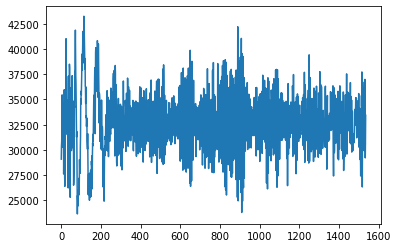

In [490]:
plt.plot(all_ascans[2])

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


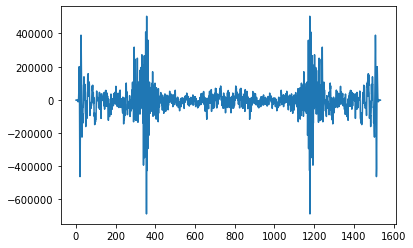

In [491]:
plt.plot(fft.fft(all_ascans[2])[1:])

In [516]:
a = np.zeros((400, ))
a[:200] = all_ascans[2][600:800]

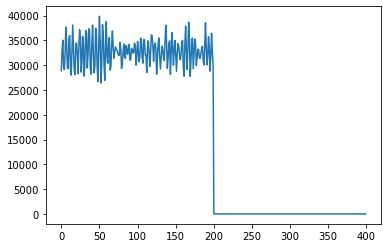

In [517]:
plt.plot(a)

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


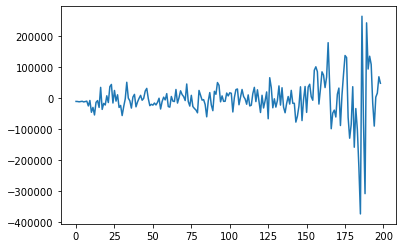

In [522]:
b = all_ascans[2][600:1400]
plt.plot(fft.fft(b)[1:200])

In [523]:
import PreprocessRawData
file_list, _ = PreprocessRawData.PreprocessRawData.get_test_train_file_lists()

In [524]:
len(file_list)

285

In [526]:
28500/3

9500.0

In [525]:
8800*3

26400

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


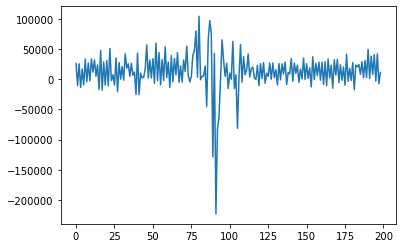

In [519]:
plt.plot(fft.fft(a)[1:200])

In [442]:
#all_ascans = np.array(all_ascans)
all_ascans_crop = all_ascans[:, 400:1401]
all_ascans_transformed = np.abs(fft.ifft(all_ascans_crop))[:, 1:]
all_ascans_transformed.shape

(801, 1000)

In [428]:
2 * b_size * c_size / 4

2093056.0

In [466]:
pca = PCA(n_components=51)
pca.fit(all_ascans_transformed[::10])
reshaped_instance_reduced = pca.transform(all_ascans_transformed)
reduced_ascans = pca.inverse_transform(reshaped_instance_reduced)

In [477]:
reshaped_instance_reduced_2 = (reshaped_instance_reduced - reshaped_instance_reduced[::100].mean()) / reshaped_instance_reduced[::100].std()

In [484]:
list(range(0, 5, 3))

[1, 4]

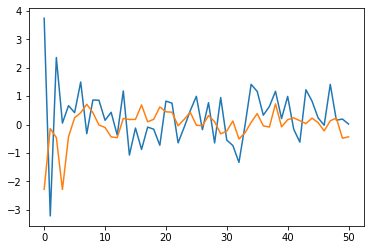

In [478]:
i1 = random.randint(0, 801)
plt.plot(reshaped_instance_reduced_2[i1])
i2 = random.randint(0, 801)
#plt.plot(reshaped_instance_reduced_2[i2])
plt.plot(reshaped_instance_reduced_2[-1])

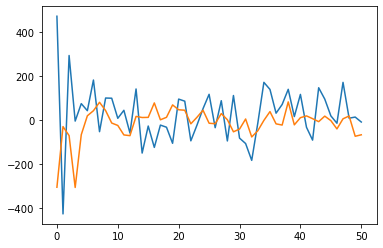

In [479]:
plt.plot(reshaped_instance_reduced[i1])
#plt.plot(reshaped_instance_reduced[i2])
plt.plot(reshaped_instance_reduced[-1])

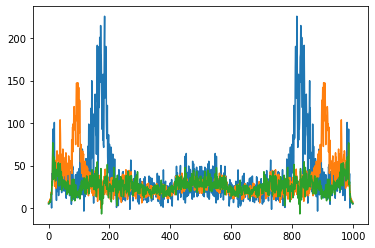

In [480]:
plt.plot(reduced_ascans[i1])
plt.plot(reduced_ascans[i2])
plt.plot(reduced_ascans[-1])

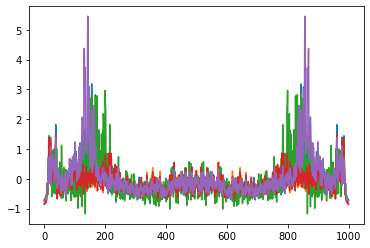

In [439]:
plt.plot(reduced_ascans_2[i1])
plt.plot(reduced_ascans_2[i2])
plt.plot(reduced_ascans_2[i3])
plt.plot(reduced_ascans_2[-1])
plt.plot(reduced_ascans_2[-2])

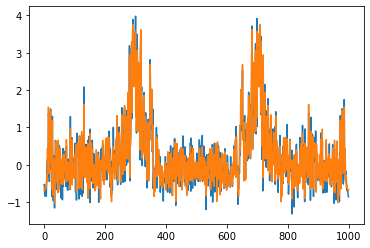

In [413]:
plt.plot(reduced_ascans_3[i3])
plt.plot(reduced_ascans_2[i3])

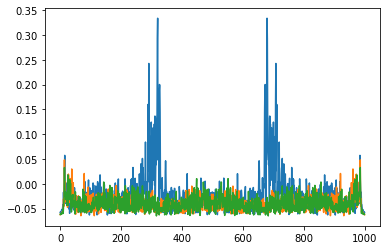

In [415]:
plt.plot(all_ascans_transformed_2[i1][1:])
plt.plot(all_ascans_transformed_2[i2][1:])
plt.plot(all_ascans_transformed_2[i3][1:])
plt.plot(all_ascans_transformed_2[-1][1:])
plt.plot(all_ascans_transformed_2[-2][1:])

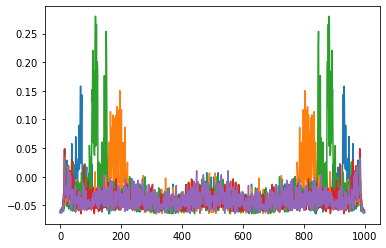

In [353]:
plt.plot(all_ascans_transformed_2[i1][1:])
plt.plot(all_ascans_transformed_2[i2][1:])
plt.plot(all_ascans_transformed_2[i3][1:])
plt.plot(all_ascans_transformed_2[-1][1:])
plt.plot(all_ascans_transformed_2[-2][1:])